In [92]:
import numpy as np
import re 
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
#from sklearn.linear_model import LinearRegression

def get_numbers_only(input_string, mode): 
    '''Used to filter megawatt hours and date and TIME from the html code'''
    if mode == "date":
        mode_code = r'\b\d{4}-\d{2}-\d{2}\b'
    elif mode == "mwh":
        mode_code = r'[\d,]+'
    else: 
        return "incorrect code, please check"

    match = re.search(mode_code, input_string)
    #Check if a match was found
    if match:
        #Remove commas from the matched string and convert it to an integer
        number = match.group().replace(',', '')
        return number
    else:
        print("No number found in the input string.")

In [93]:
file_object = open("battery-report.html", "r")
html_data = file_object.read()
#print(data)
file_object.close()
data = BeautifulSoup(html_data, 'html.parser')

In [94]:
target_text = "Battery capacity history"
h2_element = data.find("h2", string=lambda text: text and text.strip() == target_text) 
#addresses the issue of exact matching by stripping the whitespaces and \ns near the target string"

if h2_element:
    #gets everything between <h2>Heading 2A</h2> and <h2>Heading 2B</h2>
    content = []

    #starts from the next element after the <h2>Heading 2A</h2>
    current_element = h2_element.find_next_sibling()

    while current_element and current_element.name != 'h2':
        content.append(str(current_element))
        current_element = current_element.find_next_sibling()

    # joins the content
    result = '\n'.join(content)

else:
    print(f"didnt find with {target_text} sed :()")

In [95]:
table = BeautifulSoup(result,"html.parser")
charge_capacity_all = table.find_all("td", class_ = "mw")#contains the other column("Original Charge")

#table.find_all("td", class_ = "dateTime") the dates are in week times and then rest in single days(not a full week)
if charge_capacity_all:
    
    charge_capacity_new = charge_capacity_all[::2]#with the other column removed

    charge_capacity_list = []
    
    for charge in charge_capacity_new:
        mwh = charge.prettify()
        charge_capacity_list.append(int(get_numbers_only(mwh,"mwh")))

else: 
    print("not found the mw class... please double check")

charge_capacity_list


[72261,
 72111,
 72082,
 72082,
 72627,
 71681,
 70156,
 71398,
 72138,
 71892,
 71629,
 72137,
 71764,
 72206,
 72530,
 71736,
 69353,
 69703,
 71095,
 70287,
 70298,
 69131,
 69143,
 69966,
 69932,
 69528,
 69286,
 67281,
 64101,
 65580,
 65580,
 65140,
 65466,
 66352,
 64044,
 66268,
 65443,
 66151,
 65567,
 64937,
 63933,
 63293,
 63347,
 63215,
 63347,
 62742,
 63210,
 63284,
 64603,
 64394,
 63334,
 63429,
 63247,
 63738,
 64018,
 64053,
 64397,
 64074,
 62193,
 61036,
 60680,
 60774,
 60844,
 62044,
 62242,
 62391,
 62498,
 61734,
 60489,
 61215,
 62049,
 61950,
 63007,
 62752,
 62532,
 61906,
 61408,
 59952,
 59344,
 59479,
 59682,
 60326,
 60085,
 60171,
 60011,
 60005,
 57592,
 58014,
 56226,
 56480,
 56776,
 57221,
 57898,
 57497,
 56948,
 57367,
 56222,
 57265,
 57119,
 56172,
 56023,
 57096,
 57458,
 56649,
 56914,
 57610,
 57499,
 57566,
 57576,
 57043,
 56103,
 55485,
 55573,
 56397,
 55568,
 55537,
 55731,
 54899,
 54178,
 53760,
 53024,
 53024,
 53070,
 53135,
 53135,


In [96]:
dates = table.find_all("td", class_ = "dateTime") 

if dates:

    date_list = []
    
    for date in dates:
        filtered_date = date.prettify()
        date_list.append(get_numbers_only(filtered_date,"date"))

else: 
    print("not found the mw class... please double check")

date_list

['2021-01-04',
 '2021-01-18',
 '2021-01-25',
 '2021-02-01',
 '2021-02-16',
 '2021-02-22',
 '2021-03-15',
 '2021-03-22',
 '2021-03-29',
 '2021-04-12',
 '2021-04-19',
 '2021-04-26',
 '2021-05-03',
 '2021-05-10',
 '2021-05-17',
 '2021-05-24',
 '2021-05-31',
 '2021-06-07',
 '2021-06-21',
 '2021-06-28',
 '2021-07-05',
 '2021-07-12',
 '2021-07-19',
 '2021-07-26',
 '2021-08-02',
 '2021-08-09',
 '2021-08-16',
 '2021-08-23',
 '2021-08-30',
 '2021-09-06',
 '2021-09-13',
 '2021-09-20',
 '2021-09-27',
 '2021-10-04',
 '2021-10-11',
 '2021-10-18',
 '2021-10-25',
 '2021-11-01',
 '2021-11-08',
 '2021-11-15',
 '2021-11-22',
 '2021-11-29',
 '2021-12-06',
 '2021-12-13',
 '2021-12-27',
 '2022-01-03',
 '2022-01-10',
 '2022-01-24',
 '2022-02-07',
 '2022-02-14',
 '2022-02-21',
 '2022-02-28',
 '2022-03-07',
 '2022-03-14',
 '2022-03-21',
 '2022-03-28',
 '2022-04-11',
 '2022-04-18',
 '2022-04-25',
 '2022-05-02',
 '2022-05-09',
 '2022-05-16',
 '2022-05-23',
 '2022-05-31',
 '2022-06-06',
 '2022-06-13',
 '2022-06-

In [97]:
import pandas as pd
import datetime as dt



columns = list(zip(date_list, charge_capacity_list))
df = pd.DataFrame(columns, columns=['Dates','Charge Capacity(mwh)'])
df['Dates'] = pd.to_datetime(df['Dates'])
df['Dates'] = df['Dates'].map(dt.datetime.toordinal)#Lin. Regression doesn't work with string year month time lol

df


,Dates,Charge Capacity(mwh)
0,737794,72261
1,737808,72111
2,737815,72082
3,737822,72082
4,737837,72627
...,...,...
123,738749,53135
124,738750,53135
125,738751,53135
126,738752,53135


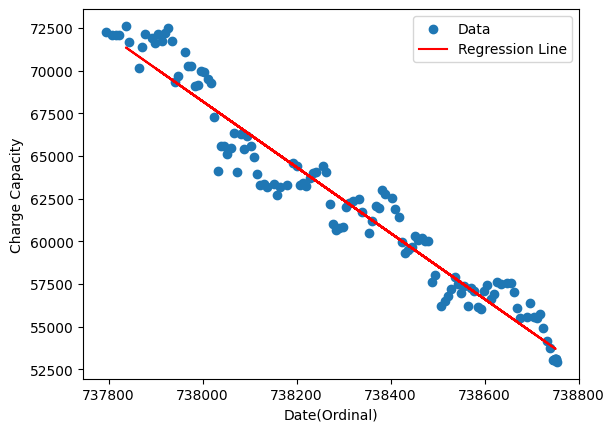

mse: 1658302.128953369
rmse: 1287.7508023501166


In [108]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = np.array(df.get("Dates")).reshape(-1, 1) 
y = np.array(df.get("Charge Capacity(mwh)"))

#Standard 80% training, 20% testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

#Predict y from x
y_predicted = model.predict(x_test)

plt.scatter(x, y, label="Data")

plt.plot(x_test, y_predicted, color='red', label="Regression Line")

plt.xlabel("Date(Ordinal)")
plt.ylabel("Charge Capacity")
plt.legend()
plt.show()

#RMSE
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print(f"mse: {mse}")
print(f"rmse: {rmse}")

#1287 megawatt hours <- not bad

